In [1]:
import numpy as np
import matplotlib.pyplot as plt
from models import topaz

In [2]:
grid_info = '/cluster/work/users/yingyue/data/TP4/grid.info'

path = '/cluster/work/users/yingyue/data/TP4'
mask = topaz.get_mask(path+'/depth_TP4b0.12_01.a')

filename = path+'/TP4restart2007_002_00_mem004.a'
u = topaz.read_data(filename, 'u', level=1, mask=mask)
v = topaz.read_data(filename, 'v', level=1, mask=mask)
current = np.array([u, v])
ssh  = topaz.read_data(filename, 'ssh', mask=mask)

In [3]:
from models.topaz.abfile import ABFileRestart, ABFileBathy
f = ABFileRestart(filename, 'r', idm=800, jdm=880)
#[rec['k'] for i, rec in f.fields.items() if rec['field']=='dp']

In [4]:
f.fieldnames

{'dp',
 'dpmixl',
 'ficem',
 'fy_age',
 'fy_frac',
 'hicem',
 'hsnwm',
 'msshb',
 'pbavg',
 'pbot',
 'psikk',
 'rdg_frac',
 'rf_cloud',
 'rf_prcp',
 'rf_rlhum',
 'rf_slp',
 'rf_sss',
 'rf_sst',
 'rf_tair',
 'rf_taux',
 'rf_tauy',
 'rf_wspd',
 'saln',
 'ssh',
 'sstb',
 'tauxice',
 'tauyice',
 'temp',
 'thkk',
 'ticem',
 'tsrfm',
 'u',
 'ubavg',
 'uice',
 'v',
 'vbavg',
 'vice'}

In [5]:
dp = np.zeros((50, 880, 800))
for z in range(50):
    dp[z, :, :] = topaz.read_data(filename, 'dp', level=z+1, mask=mask)
zlevel = np.cumsum(dp/9.8/1020, axis=0)

f = ABFileBathy(path+'/depth_TP4b0.12_01.a', 'r', idm=800, jdm=880)
zmax = f.read_field('depth')
zmax[mask] = 0.
    
from assim_tools.basic_io import nc_write_var
nc_write_var('1.nc', {'z':50, 'y':880, 'x':800}, 'zlevel', zlevel)
nc_write_var('1.nc', {'y':880, 'x':800}, 'zmax', zmax)

In [6]:
np.sum(mask.astype(int)), 800*880

(400835, 704000)

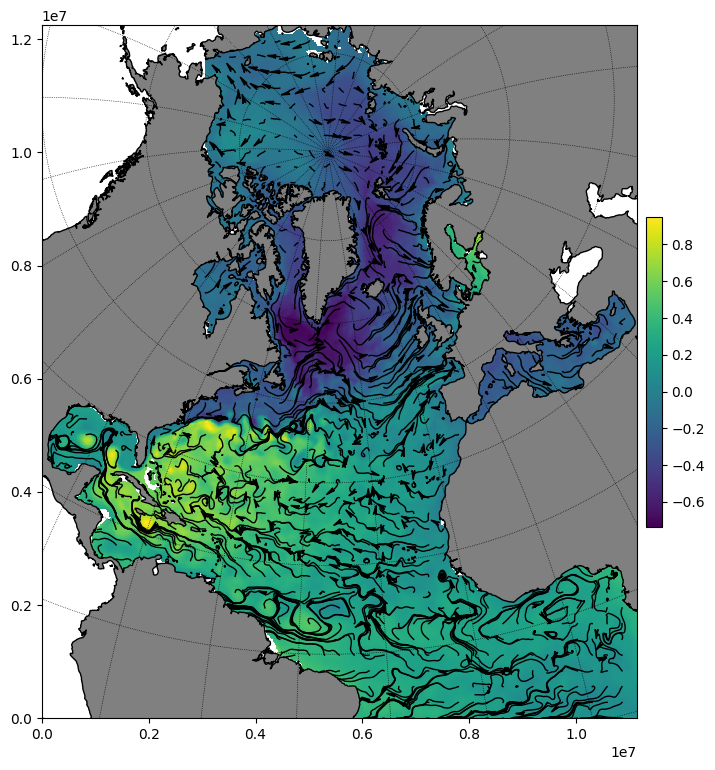

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(8,9))

topaz.grid.plot_field(ax, ssh)
topaz.grid.plot_vectors(ax, current, V=0.1, num_steps=50)
topaz.grid.plot_land(ax, color='gray', dlat=15, dlon=15)

In [8]:
import pyproj
from grid import Grid, Converter, regular_grid
proj = pyproj.Proj('+proj=stere +lon_0=0 +lat_0=90')
x, y = regular_grid(-3.5e6, 2.5e6, -3.5e6, 2.5e6, dx=1e4)
grid = Grid(proj, x, y)
conv = Converter(topaz.grid, grid)

In [9]:
current_ = conv.convert(current, is_vector=True)
ssh_ = conv.convert(ssh)

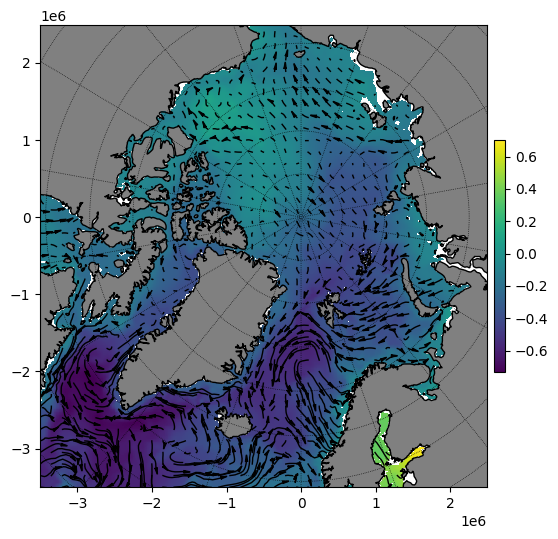

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
grid.plot_field(ax, ssh_)
grid.plot_vectors(ax, current_)
grid.plot_land(ax, color='gray')

In [ ]:
##vertical layers
dp = topaz.read_data(filename, 'dp', )